In [2]:
# Import necessary libraries
import cv2
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Set the data path
train_path = '/Users/obuli/Documents/Documents - Obuli’s MacBook Air/MILITARY/military_object_dataset/train'


### Load Dataset Info

In [4]:
# Function to load image and label paths
def load_dataset_info(path):
    image_paths = []
    label_paths = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(('.jpg', '.png')):
                image_paths.append(os.path.join(root, file))
            elif file.endswith('.txt'):
                label_paths.append(os.path.join(root, file))
    return image_paths, label_paths

# Load the dataset
image_paths, label_paths = load_dataset_info(train_path)

print(f"Number of images: {len(image_paths)}")
print(f"Number of label files: {len(label_paths)}")

Number of images: 21978
Number of label files: 21978


### Image Analysis - Size and Resolution

In [6]:
# 1. Image Analysis
# a. Image Size and Resolution
def get_image_dimensions(image_paths):
    heights = []
    widths = []
    for img_path in image_paths[:100]:  # Limit to 100 for initial analysis
        img = cv2.imread(img_path)
        if img is not None:
            heights.append(img.shape[0])
            widths.append(img.shape[1])
    return heights, widths

heights, widths = get_image_dimensions(image_paths)

# Identify outliers
print(f"Min Height: {min(heights)}, Max Height: {max(heights)}")
print(f"Min Width: {min(widths)}, Max Width: {max(widths)}")

Min Height: 640, Max Height: 640
Min Width: 640, Max Width: 640


### Image Analysis - Aspect Ratio

In [8]:
# b. Aspect Ratio
aspect_ratios = [w / h for w, h in zip(widths, heights)]

print(f"Average Aspect Ratio: {np.mean(aspect_ratios):.2f}")
print(f"Min Aspect Ratio: {min(aspect_ratios):.2f}, Max Aspect Ratio: {max(aspect_ratios):.2f}")

Average Aspect Ratio: 1.00
Min Aspect Ratio: 1.00, Max Aspect Ratio: 1.00


### Image Analysis - Image Quality

In [9]:
# c. Image Quality (Basic Check)
def check_image_quality(img_path):
    img = cv2.imread(img_path, 0)  # Grayscale
    if img is None:
        return 'Corrupted'
    # Simple check for blur using Laplacian variance
    laplacian_var = cv2.Laplacian(img, cv2.CV_64F).var()
    return 'Blurry' if laplacian_var < 100 else 'Clear'

# Test on a sample
sample_quality = [check_image_quality(img_path) for img_path in image_paths[:10]]
print(f"Sample Quality Check: {sample_quality}")

# Note: For a thorough quality check, consider manual review or advanced metrics later.

Sample Quality Check: ['Clear', 'Clear', 'Clear', 'Clear', 'Clear', 'Clear', 'Clear', 'Clear', 'Clear', 'Clear']


### Annotation Analysis - Number of Annotations

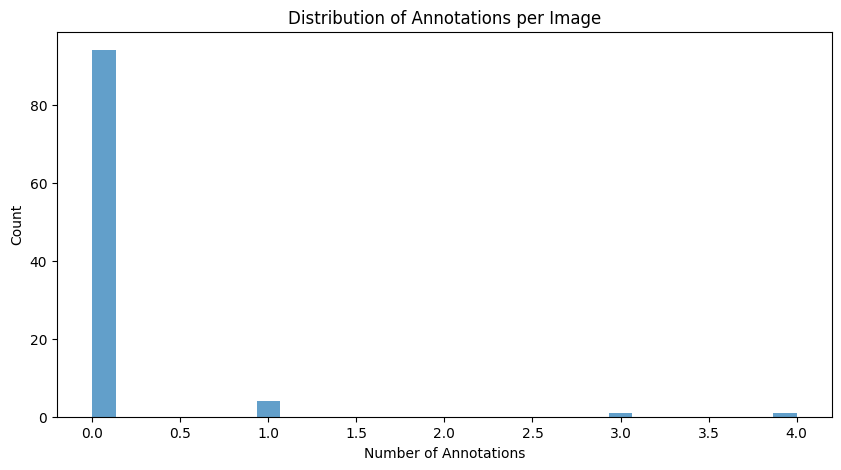

Average Annotations per Image: 0.11
Max Annotations: 4


In [10]:
# 2. Annotation Analysis
# a. Number of Annotations per Image
def count_annotations(label_paths):
    annotation_counts = []
    for label_path in label_paths[:100]:  # Limit to 100 for initial analysis
        with open(label_path, 'r') as f:
            lines = f.readlines()
            annotation_counts.append(len(lines))
    return annotation_counts

annotation_counts = count_annotations(label_paths)

plt.figure(figsize=(10, 5))
plt.hist(annotation_counts, bins=30, alpha=0.7)
plt.title('Distribution of Annotations per Image')
plt.xlabel('Number of Annotations')
plt.ylabel('Count')
plt.show()

print(f"Average Annotations per Image: {np.mean(annotation_counts):.2f}")
print(f"Max Annotations: {max(annotation_counts)}")

### Annotation Analysis - Bounding Box Size Distribution

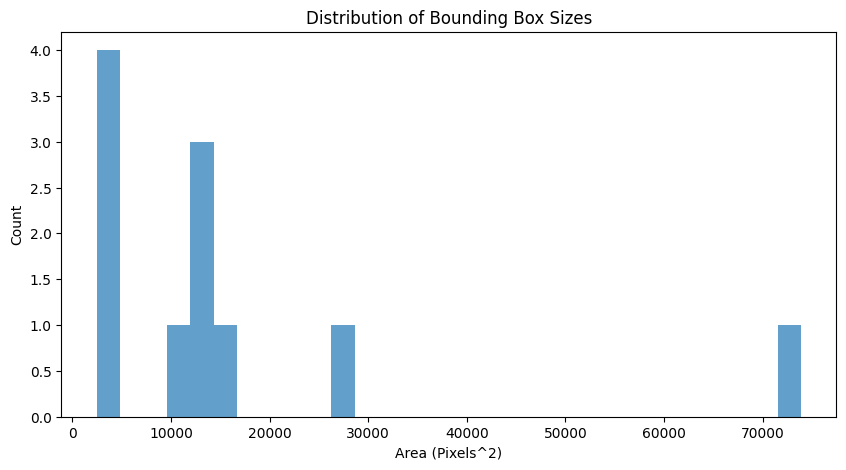

Average Box Size: 16310.35
Min Box Size: 2451.65, Max Box Size: 73889.24


In [11]:
# b. Bounding Box Size Distribution
def get_bounding_box_sizes(label_paths):
    box_sizes = []
    for label_path in label_paths[:100]:
        with open(label_path, 'r') as f:
            lines = f.readlines()
            for line in lines:
                _, x_center, y_center, width, height = map(float, line.strip().split())
                img_path = label_path.replace('.txt', '.jpg').replace('labels', 'images')
                img = cv2.imread(img_path)
                if img is not None:
                    img_width, img_height = img.shape[1], img.shape[0]
                    box_width = width * img_width
                    box_height = height * img_height
                    box_sizes.append(box_width * box_height)
    return box_sizes

box_sizes = get_bounding_box_sizes(label_paths)

plt.figure(figsize=(10, 5))
plt.hist(box_sizes, bins=30, alpha=0.7)
plt.title('Distribution of Bounding Box Sizes')
plt.xlabel('Area (Pixels^2)')
plt.ylabel('Count')
plt.show()

print(f"Average Box Size: {np.mean(box_sizes):.2f}")
print(f"Min Box Size: {min(box_sizes):.2f}, Max Box Size: {max(box_sizes):.2f}")

### Annotation Analysis - Bounding Box Aspect Ratio

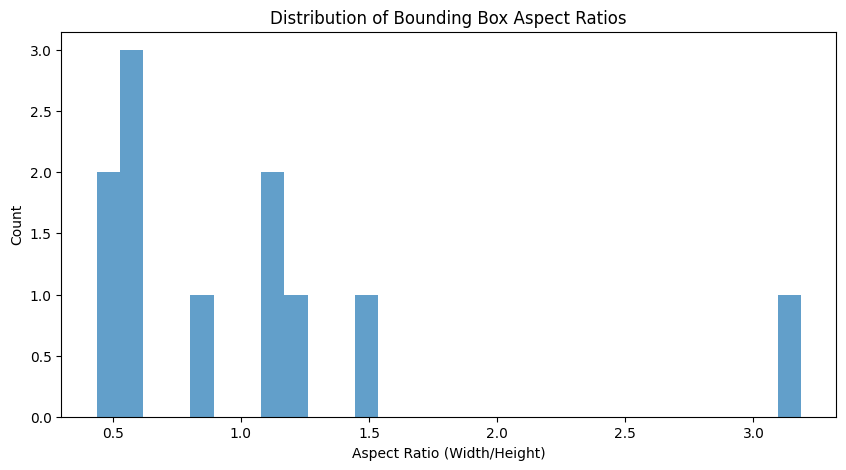

Average Box Aspect Ratio: 1.05
Min Aspect Ratio: 0.44, Max Aspect Ratio: 3.19


In [12]:
# c. Bounding Box Aspect Ratio
def get_bounding_box_aspect_ratios(label_paths):
    aspect_ratios = []
    for label_path in label_paths[:100]:
        with open(label_path, 'r') as f:
            lines = f.readlines()
            for line in lines:
                _, _, _, width, height = map(float, line.strip().split())
                aspect_ratios.append(width / height)
    return aspect_ratios

box_aspect_ratios = get_bounding_box_aspect_ratios(label_paths)

plt.figure(figsize=(10, 5))
plt.hist(box_aspect_ratios, bins=30, alpha=0.7)
plt.title('Distribution of Bounding Box Aspect Ratios')
plt.xlabel('Aspect Ratio (Width/Height)')
plt.ylabel('Count')
plt.show()

print(f"Average Box Aspect Ratio: {np.mean(box_aspect_ratios):.2f}")
print(f"Min Aspect Ratio: {min(box_aspect_ratios):.2f}, Max Aspect Ratio: {max(box_aspect_ratios):.2f}")

### Class Distribution - Class Frequency

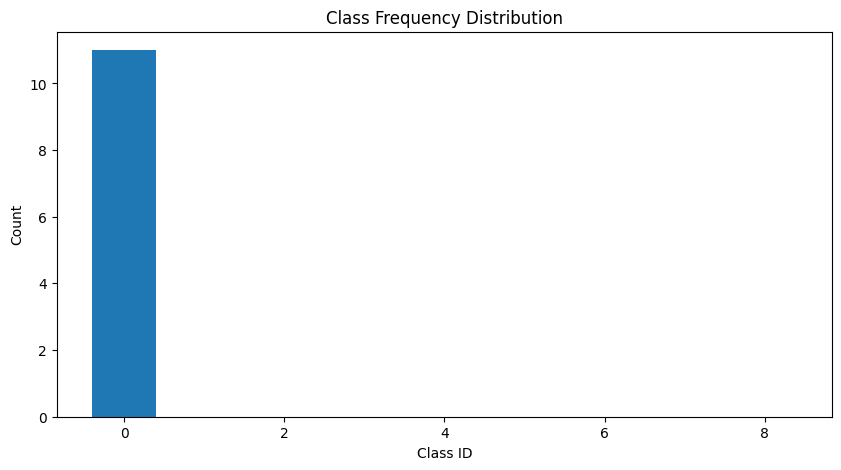

Class Frequencies: {0: 11, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0}


In [13]:
# 3. Class Distribution
# a. Class Frequency
def get_class_frequencies(label_paths):
    class_counts = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0}  # Based on your class labels
    for label_path in label_paths[:100]:
        with open(label_path, 'r') as f:
            lines = f.readlines()
            for line in lines:
                class_id = int(line.strip().split()[0])
                class_counts[class_id] += 1
    return class_counts

class_freq = get_class_frequencies(label_paths)

plt.figure(figsize=(10, 5))
plt.bar(class_freq.keys(), class_freq.values())
plt.title('Class Frequency Distribution')
plt.xlabel('Class ID')
plt.ylabel('Count')
plt.show()

print("Class Frequencies:", class_freq)

### Class Distribution - Class Co-occurrence

In [14]:
# b. Class Co-occurrence
def get_class_cooccurrence(label_paths):
    cooccurrence = {}
    for label_path in label_paths[:100]:
        with open(label_path, 'r') as f:
            lines = f.readlines()
            classes_in_image = [int(line.strip().split()[0]) for line in lines]
            for i in range(len(classes_in_image)):
                for j in range(i + 1, len(classes_in_image)):
                    pair = tuple(sorted([classes_in_image[i], classes_in_image[j]]))
                    cooccurrence[pair] = cooccurrence.get(pair, 0) + 1
    return cooccurrence

cooccurrence = get_class_cooccurrence(label_paths)

print("Class Co-occurrence:", cooccurrence)

Class Co-occurrence: {(0, 0): 9}


### Visualization - Sample Images with Annotations

Image: /Users/obuli/Documents/Documents - Obuli’s MacBook Air/MILITARY/military_object_dataset/train/images/003301.jpg, Intended Label: /Users/obuli/Documents/Documents - Obuli’s MacBook Air/MILITARY/military_object_dataset/train/labels/003301.txt
Lines read from /Users/obuli/Documents/Documents - Obuli’s MacBook Air/MILITARY/military_object_dataset/train/labels/003301.txt: ['0 0.4546875 0.46640625 0.49140625 0.64296875']


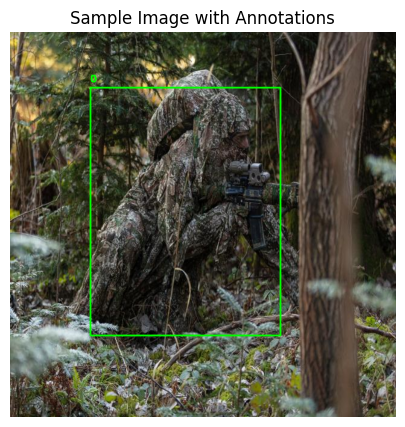

In [21]:
# 4. Visualization
# a. Sample Images with Annotations
def plot_sample_with_annotations(image_path, label_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    label_filename = os.path.basename(image_path).replace('.jpg', '.txt').replace('.png', '.txt')
    label_full_path = os.path.join(os.path.dirname(label_path).replace('images', 'labels'), label_filename)
    with open(label_full_path, 'r') as f:
        lines = f.readlines()
        print(f"Lines read from {label_full_path}: {lines}")  # Debug print
        for line in lines:
            class_id, x_center, y_center, width, height = map(float, line.strip().split())
            img_height, img_width = img.shape[:2]
            x_center *= img_width
            y_center *= img_height
            width *= img_width
            height *= img_height
            x_min = int(x_center - width / 2)
            y_min = int(y_center - height / 2)
            x_max = int(x_center + width / 2)
            y_max = int(y_center + height / 2)
            cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
            cv2.putText(img, str(int(class_id)), (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    plt.figure(figsize=(10, 5))
    plt.imshow(img)
    plt.title('Sample Image with Annotations')
    plt.axis('off')
    plt.show()

# Plot first sample with debug
if image_paths and label_paths:
    print(f"Image: {image_paths[0]}, Intended Label: {os.path.join(os.path.dirname(image_paths[0]).replace('images', 'labels'), os.path.basename(image_paths[0]).replace('.jpg', '.txt'))}")
    plot_sample_with_annotations(image_paths[0], label_paths[0])

### Visualization - Heatmaps (Basic Density)

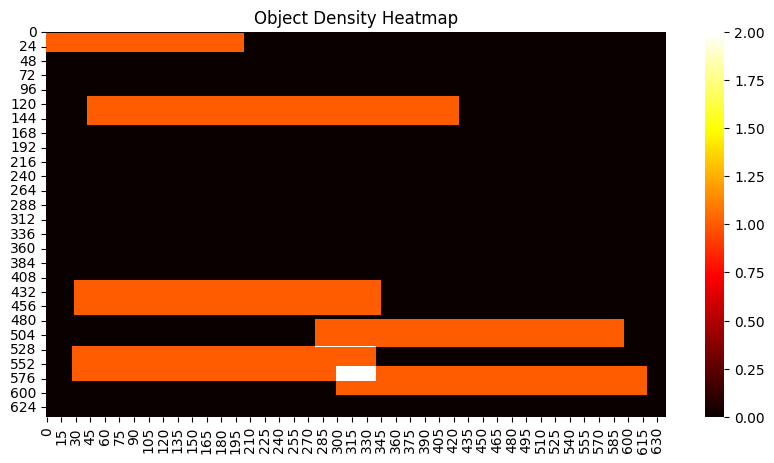

In [22]:
# b. Heatmaps
def create_heatmap(image_path, label_path):
    img = np.zeros((cv2.imread(image_path).shape[:2]), dtype=np.float32)
    with open(label_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            class_id, x_center, y_center, width, height = map(float, line.strip().split())
            img_height, img_width = img.shape
            x_center *= img_width
            y_center *= img_height
            width *= img_width
            height *= img_height
            x_min = int(x_center - width / 2)
            y_min = int(y_center - height / 2)
            x_max = int(x_center + width / 2)
            y_max = int(y_center + height / 2)
            img[y_min:y_max, x_min:x_max] += 1
    plt.figure(figsize=(10, 5))
    sns.heatmap(img, cmap='hot', cbar=True)
    plt.title('Object Density Heatmap')
    plt.show()

# Plot heatmap for first sample
if image_paths and label_paths:
    create_heatmap(image_paths[0], label_paths[0])

### Dataset Splits - Train-Test-Validation Distribution

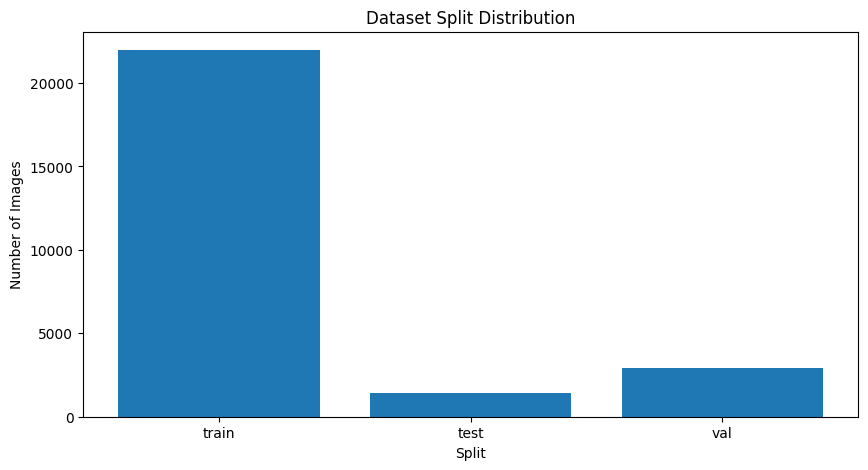

Split Distribution: {'train': 21978, 'test': 1396, 'val': 2941}


In [25]:
# 5. Dataset Splits
# a. Train-Test-Validation Distribution
# Assuming you have train, test, and val directories
def analyze_dataset_splits(base_path):
    splits = {'train': 0, 'test': 0, 'val': 0}
    for split in splits.keys():
        split_path = os.path.join(base_path, '..', split, 'images')  # Adjust based on your structure
        if os.path.exists(split_path):
            image_paths_split = [f for f in os.listdir(split_path) if f.endswith(('.jpg', '.png'))]
            splits[split] = len(image_paths_split)
    return splits

base_path = '/Users/obuli/Documents/Documents - Obuli’s MacBook Air/MILITARY/military_object_dataset'
split_counts = analyze_dataset_splits(train_path)

plt.figure(figsize=(10, 5))
plt.bar(split_counts.keys(), split_counts.values())
plt.title('Dataset Split Distribution')
plt.xlabel('Split')
plt.ylabel('Number of Images')
plt.show()

print("Split Distribution:", split_counts)

### Data Augmentation Analysis - Augmentation Impact

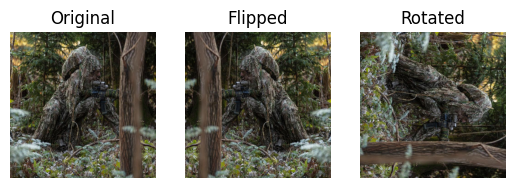

Note: Augmentations like flipping and rotating can help balance the dataset, but ensure annotations are adjusted accordingly.


In [26]:
# 6. Data Augmentation Analysis
# a. Augmentation Impact
def apply_augmentation(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title('Original')
    plt.axis('off')
    
    # Flipped horizontally
    flipped = cv2.flip(img, 1)
    plt.subplot(1, 3, 2)
    plt.imshow(flipped)
    plt.title('Flipped')
    plt.axis('off')
    
    # Rotated 90 degrees
    rotated = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    plt.subplot(1, 3, 3)
    plt.imshow(rotated)
    plt.title('Rotated')
    plt.axis('off')
    
    plt.show()

# Apply to a sample image
if image_paths:
    apply_augmentation(image_paths[0])
    print("Note: Augmentations like flipping and rotating can help balance the dataset, but ensure annotations are adjusted accordingly.")

### Challenges and Insights - Small Object Detection

In [28]:
# 7. Challenges and Insights
# a. Small Object Detection
def analyze_small_objects(label_paths):
    small_boxes = 0
    total_boxes = 0
    for label_path in label_paths[:100]:
        img_path = label_path.replace('.txt', '.jpg').replace('labels', 'images')
        img = cv2.imread(img_path)
        if img is not None:
            img_width, img_height = img.shape[1], img.shape[0]
            with open(label_path, 'r') as f:
                lines = f.readlines()
                for line in lines:
                    parts = line.strip().split()
                    if len(parts) >= 5:  # Ensure at least 5 values
                        class_id, x_center, y_center, width, height = map(float, parts[:5])  # Take first 5
                        box_area = (width * img_width) * (height * img_height)
                        total_boxes += 1
                        if box_area < 5000:  # Threshold for small objects
                            small_boxes += 1
                    else:
                        print(f"Warning: Invalid line in {label_path}: {line}")
    return small_boxes, total_boxes

small_boxes, total_boxes = analyze_small_objects(label_paths)
small_ratio = (small_boxes / total_boxes) * 100 if total_boxes > 0 else 0

print(f"Percentage of small objects (area < 5000 pixels^2): {small_ratio:.2f}%")
print("Consider using higher resolution or specialized anchor boxes for small object detection.")

Percentage of small objects (area < 5000 pixels^2): 32.14%
Consider using higher resolution or specialized anchor boxes for small object detection.


### Challenges and Insights - Class Imbalance

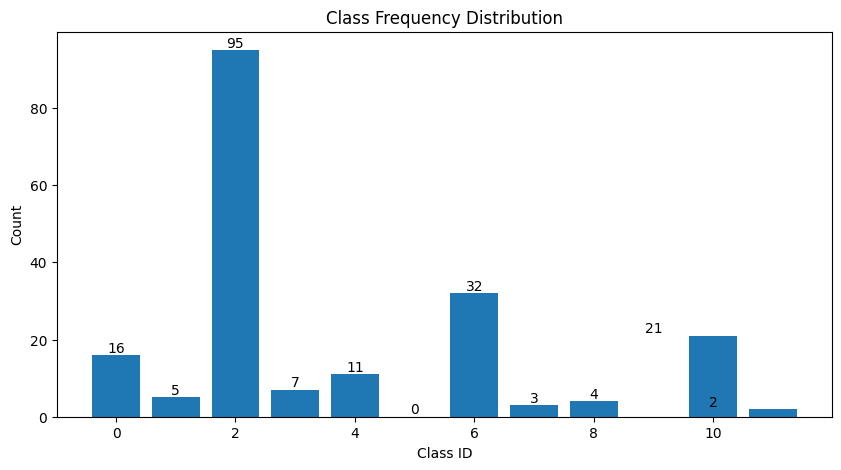

Minimum class count: 0
If certain classes have low counts (e.g., trenches), consider oversampling or synthetic data generation.


In [30]:
# b. Class Imbalance
def get_class_frequencies(label_paths):
    class_counts = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0}  # Based on your class labels
    for label_path in label_paths[:100]:  # Limit to 100 for initial analysis
        with open(label_path, 'r') as f:
            lines = f.readlines()
            for line in lines:
                parts = line.strip().split()
                if len(parts) >= 1:  # Ensure at least class_id is present
                    class_id = int(parts[0])
                    if class_id not in class_counts:
                        class_counts[class_id] = 0  # Initialize new class ID
                        print(f"Warning: New class ID {class_id} detected in {label_path}")
                    class_counts[class_id] += 1
    return class_counts

class_freq = get_class_frequencies(label_paths)

plt.figure(figsize=(10, 5))
plt.bar(class_freq.keys(), class_freq.values())
plt.title('Class Frequency Distribution')
plt.xlabel('Class ID')
plt.ylabel('Count')
for i, v in enumerate(class_freq.values()):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

min_class_count = min(class_freq.values())
print(f"Minimum class count: {min_class_count}")
print("If certain classes have low counts (e.g., trenches), consider oversampling or synthetic data generation.")

### Challenges and Insights - Annotation Quality

In [31]:
# c. Annotation Quality
def check_annotation_quality(label_paths):
    missing_annotations = 0
    for label_path in label_paths[:100]:
        with open(label_path, 'r') as f:
            lines = f.readlines()
            if not lines:
                missing_annotations += 1
    return missing_annotations

missing_annotations = check_annotation_quality(label_paths)
print(f"Number of label files with missing annotations: {missing_annotations}")
print("Review and correct missing annotations using tools like LabelImg or CVAT.")

Number of label files with missing annotations: 1
Review and correct missing annotations using tools like LabelImg or CVAT.


### Select 1000-Image Subset

In [39]:
# 8. Preprocessing
# a. Select 1000-Image Subset
import random
import shutil
import os

# Define the subset size and base path
subset_size = 1000
random.seed(42)  # For reproducibility
base_path = '/Users/obuli/Documents/Documents - Obuli’s MacBook Air/MILITARY/military_object_dataset/train/images'
image_paths = [os.path.join(base_path, f) for f in os.listdir(base_path) if f.endswith(('.jpg', '.png'))]

# Check if we have enough images
if len(image_paths) < subset_size:
    print(f"Warning: Only {len(image_paths)} images found. Adjusting subset_size to {len(image_paths)}.")
    subset_size = len(image_paths)

subset_image_paths = random.sample(image_paths, subset_size)

# Create a directory for the subset
subset_train_path = '/Users/obuli/Documents/Documents - Obuli’s MacBook Air/MILITARY/military_object_dataset/subset_train'
os.makedirs(os.path.join(subset_train_path, 'images'), exist_ok=True)
os.makedirs(os.path.join(subset_train_path, 'labels'), exist_ok=True)

# Copy images and corresponding labels
for img_path in subset_image_paths:
    img_filename = os.path.basename(img_path)
    label_filename = img_filename.replace('.jpg', '.txt').replace('.png', '.txt')
    label_path = os.path.join(base_path.replace('images', 'labels'), label_filename)
    if os.path.exists(label_path):
        shutil.copy(img_path, os.path.join(subset_train_path, 'images', img_filename))
        shutil.copy(label_path, os.path.join(subset_train_path, 'labels', label_filename))
    else:
        print(f"Warning: No label found for {img_path}, skipping.")

print(f"Created subset with {len(os.listdir(os.path.join(subset_train_path, 'images')))} images and {len(os.listdir(os.path.join(subset_train_path, 'labels')))} labels.")

Created subset with 1000 images and 1000 labels.


### Verify Subset and Handle Missing Labels

In [40]:
# b. Verify Subset and Handle Missing Labels
subset_images = os.listdir(os.path.join(subset_train_path, 'images'))
subset_labels = os.listdir(os.path.join(subset_train_path, 'labels'))

missing_labels = [img for img in subset_images if img.replace('.jpg', '.txt').replace('.png', '.txt') not in subset_labels]
if missing_labels:
    print(f"Warning: Missing labels for {len(missing_labels)} images: {missing_labels[:5]}")
    for img in missing_labels:
        os.remove(os.path.join(subset_train_path, 'images', img))
    print(f"Removed images without labels. Updated count: {len(os.listdir(os.path.join(subset_train_path, 'images')))}")
else:
    print("All images have corresponding labels.")

All images have corresponding labels.


### Prepare YOLOv5 Configuration (Updated)

In [41]:
# b. Prepare YOLOv5 Configuration
import yaml
import shutil

# Copy the existing YAML file to the YOLOv5 directory
yaml_source = '/Users/obuli/Documents/Documents - Obuli’s MacBook Air/MILITARY/military_object_dataset/military_dataset.yaml'
yaml_dest = 'data.yaml'
shutil.copy(yaml_source, yaml_dest)

# Update the path in the YAML file to point to the local subset
with open(yaml_dest, 'r') as f:
    data = yaml.safe_load(f)
data['path'] = '/Users/obuli/Documents/Documents - Obuli’s MacBook Air/MILITARY/military_object_dataset/subset_train'
data['train'] = 'images'
data['val'] = 'images'  # Using subset for both train and val for now

with open(yaml_dest, 'w') as f:
    yaml.dump(data, f)

print("Updated data.yaml with subset path. Check the file for accuracy.")

Updated data.yaml with subset path. Check the file for accuracy.


### Data Augmentation Configuration

In [42]:
# Update YOLOv5 data.yaml with augmentation settings
import yaml

# Load existing data.yaml
with open('data.yaml', 'r') as f:
    data = yaml.safe_load(f)

# Add augmentation parameters
data['augmentation'] = {
    'hsv_h': 0.015,  # Hue augmentation
    'hsv_s': 0.7,    # Saturation augmentation
    'hsv_v': 0.4,    # Value (brightness) augmentation
    'degrees': 10.0, # Rotation
    'translate': 0.1,# Translation
    'scale': 0.5,    # Scaling
    'flipud': 0.5,   # Vertical flip
    'fliplr': 0.5,   # Horizontal flip
    'mosaic': 1.0,   # Mosaic augmentation
    'mixup': 0.0     # Mixup augmentation
}

# Save updated data.yaml
with open('data.yaml', 'w') as f:
    yaml.dump(data, f)

print("Updated data.yaml with augmentation settings.")

Updated data.yaml with augmentation settings.


### Train YOLOv5 Model

In [1]:
# Train YOLOv5 model with error handling for Jupyter
import torch
import os
import yaml
import sys
from yolov5 import train

# Debugging: Verify environment setup
def verify_setup():
    # Check YOLOv5 installation
    try:
        import yolov5
        print("YOLOv5 is installed correctly.")
    except ImportError:
        raise ImportError("YOLOv5 is not installed. Run: !git clone https://github.com/ultralytics/yolov5 && pip install -r yolov5/requirements.txt")

    # Check PyTorch installation
    if not torch.__version__:
        raise ImportError("PyTorch is not installed. Run: pip install torch torchvision")

    # Check data.yaml existence
    yaml_path = 'data.yaml'
    if not os.path.exists(yaml_path):
        raise FileNotFoundError(f"'{yaml_path}' not found. Ensure it exists in the project directory.")

    # Check weights file
    weights_path = 'yolov5s.pt'
    if not os.path.exists(weights_path):
        print(f"Warning: '{weights_path}' not found. YOLOv5 will attempt to download it.")

    # Check dataset paths in data.yaml
    with open(yaml_path, 'r') as f:
        data = yaml.safe_load(f)
    subset_path = data.get('path', '')
    train_path = os.path.join(subset_path, data.get('train', ''))
    val_path = os.path.join(subset_path, data.get('val', ''))
    for path in [train_path, val_path]:
        if not os.path.exists(path):
            raise FileNotFoundError(f"Dataset path '{path}' does not exist. Check 'data.yaml' configuration.")
    
    print(f"Dataset paths verified: train={train_path}, val={val_path}")

# Run verification
try:
    verify_setup()
except Exception as e:
    print(f"Setup error: {e}")
    raise

# Check for CUDA availability
device = 0 if torch.cuda.is_available() else 'cpu'
print(f"Training on device: {device}")

# Fix Jupyter argument parsing issue
sys.argv = ['train.py']  # Reset sys.argv to avoid kernel JSON being passed

# Training parameters
try:
    train.run(
        data='data.yaml',
        imgsz=640,
        batch_size=16,
        epochs=10,
        weights='yolov5s.pt',  # Pre-trained YOLOv5s model
        project='runs/train',
        name='military_exp',
        device=device,
        cache=True
    )
    print("Model training completed. Check 'runs/train/military_exp' for results.")
except SystemExit as e:
    print(f"Training failed with SystemExit: {e}. Common causes include:")
    print("- Invalid paths in 'data.yaml' (check 'path', 'train', 'val')")
    print("- Missing or corrupted 'yolov5s.pt' weights file")
    print("- Incorrect class definitions in 'data.yaml' (ensure 'nc' and 'names' match dataset)")
    print("- Insufficient memory or incompatible device")
    print("- Jupyter kernel passing invalid arguments (should be fixed by resetting sys.argv)")
    print("Review the YOLOv5 error message above for details.")
except Exception as e:
    print(f"Unexpected error during training: {e}")
    raise

/Users/obuli/Documents/Documents - Obuli’s MacBook Air/MILITARY/yolov5/utils/general.py:32: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources as pkg
train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5/data/hyps, resume_evolve=None, bucket=, cache=True, image_weights=False, device=cpu, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=military_exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1

YOLOv5 is installed correctly.
Dataset paths verified: train=/Users/obuli/Documents/Documents - Obuli’s MacBook Air/MILITARY/military_object_dataset/subset_train/images, val=/Users/obuli/Documents/Documents - Obuli’s MacBook Air/MILITARY/military_object_dataset/subset_train/images
Training on device: cpu


github: up to date with https://github.com/ultralytics/yolov5 ✅
fatal: cannot change to '/Users/obuli/Documents/Documents': No such file or directory
YOLOv5 🚀 2025-7-15 Python-3.12.7 torch-2.7.1 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1.0, mixup=0.0, copy_paste=0.0
Comet: run 'pip install comet_ml' to automatically track and visualize YOLOv5 🚀 runs in Comet
TensorBoard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
Overriding model.yaml nc=80 with nc=12

                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Conv                      [3, 

Model training completed. Check 'runs/train/military_exp' for results.


In [3]:
# 10. Model Saving
import os
import shutil

# Save the best model weights
best_model_path = 'runs/train/military_exp3/weights/best.pt'
save_path = '/Users/obuli/Documents/Documents - Obuli’s MacBook Air/MILITARY/military_model_best.pt'
shutil.copy(best_model_path, save_path)

print(f"Model saved to {save_path}")

Model saved to /Users/obuli/Documents/Documents - Obuli’s MacBook Air/MILITARY/military_model_best.pt
